# Object Size & Intensity

This notebook shows you how to determine the size of either a single object or all of the objects in an instance segmentation dataset.

In [1]:
import numpy as np
from skimage.io import imread, imshow

%matplotlib inline

# Load Data

We will use images that you generated during last week's lecture on segmentation.

/Users/ryan/mambaforge/envs/devbio-napari-env/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


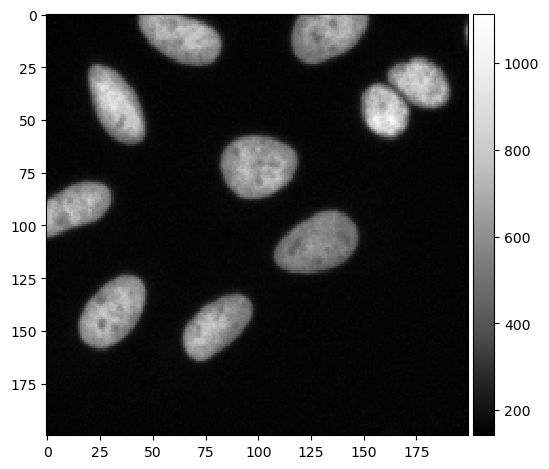

In [2]:
input_image = imread('data/cropped_raw_image.tif')
imshow(input_image, cmap='Greys_r')

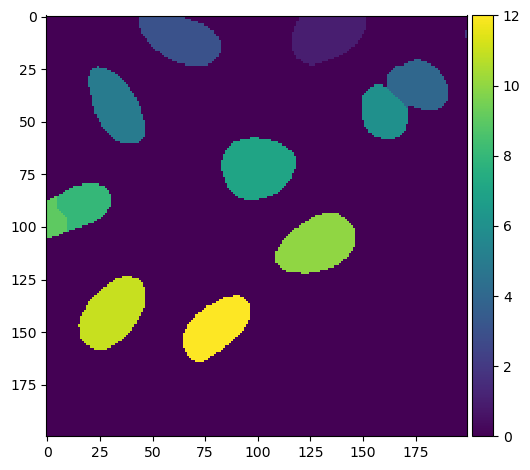

In [3]:
voronoi_otsu_segmentation = imread('data/instance_segmentation.tif')
imshow(voronoi_otsu_segmentation)

# Mean Intensity

We will use the segmentation result to calculate the mean intensity of one object in the orginal image. We will look at the object with the segmentat id $8$. To do this, we will use a neat indexing trick.

In [4]:
mean_intenstity = np.mean(input_image[voronoi_otsu_segmentation == 8])
mean_intenstity

614.1990291262136

# Minimum & Maximum Intensities

This time assign the index that we used for the mean intensity to a variable so that we can use it to calculate the object's minimum and maximum intensities in the same fashion.

In [5]:
mask = input_image[voronoi_otsu_segmentation == 8]

In [6]:
minimum_intensity = np.min(mask)
minimum_intensity

386

In [7]:
maximum_intensity = np.max(mask)
maximum_intensity

821

# Labeled Comprehension

We can use a function from the `scipy.ndimage` library called `labeled_comprehension` to run another selected function, here `np.mean`, for all objects in an instance segmentation. `labeled_comprehension` requires many inputs so read the docstring and carefully think about the correct data to pass.

In [8]:
from scipy.ndimage import labeled_comprehension

In [9]:
labels = np.unique(voronoi_otsu_segmentation) # this function finds all of the values present in an array
labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=uint8)

In [10]:
labels = labels[labels > 0] # index out background value(s)
labels

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=uint8)

In [11]:
mean_intensities = labeled_comprehension(input_image, 
                                         voronoi_otsu_segmentation, 
                                         labels, 
                                         np.mean,
                                         int, 
                                         0)

# Object Size

Here we want calculate the size, in pixels, of each object in an instance segmentation. To do this using `labeled_comprehension` we need to use a boolean image instead of the input image. 

Once we have areas in terms of pixel counts, we can then convert them to $\mu$m$^2$ if we know the $x$ and $y$ resolutions from the microscope (I have chosen the resolution randomly).

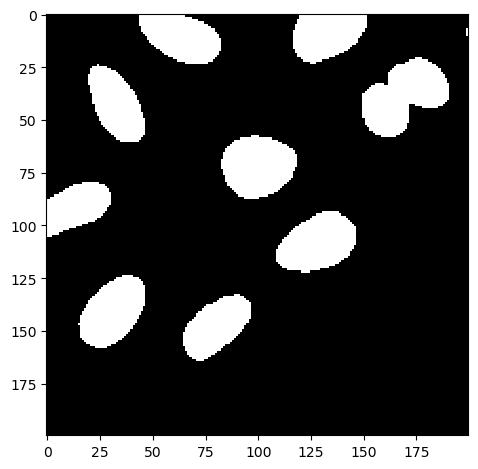

In [12]:
boolean_image = voronoi_otsu_segmentation.astype(bool)
imshow(boolean_image)

In [13]:
pixel_areas = labeled_comprehension(boolean_image, 
                                    voronoi_otsu_segmentation, 
                                    labels, 
                                    np.sum, 
                                    int, 
                                    0)
pixel_areas

array([652,   4, 684, 521, 655, 440, 824, 412, 141, 792, 758, 645])

In [14]:
x_resolution = 0.2
y_resolution = 0.2

unit_pixel = x_resolution * y_resolution
unit_pixel

0.04000000000000001

In [15]:
square_micrometer_area = pixel_areas * unit_pixel
square_micrometer_area

array([26.08,  0.16, 27.36, 20.84, 26.2 , 17.6 , 32.96, 16.48,  5.64,
       31.68, 30.32, 25.8 ])

# Plotting Your Features

Before diving into statistical analysis, sometimes it is good to plot the values of your features as a histogram or scatter plot as a sanity check to ensure that you did not somehow impart bias into your analysis. 

Below we will plot two of the features we extracted as histograms and then as a scatter plot comparing them. These plots are very simple, but if you would like to customize the axes, colors, etc. look at the following documentation:


<https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html>

<https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html>

In [16]:
import matplotlib.pyplot as plt

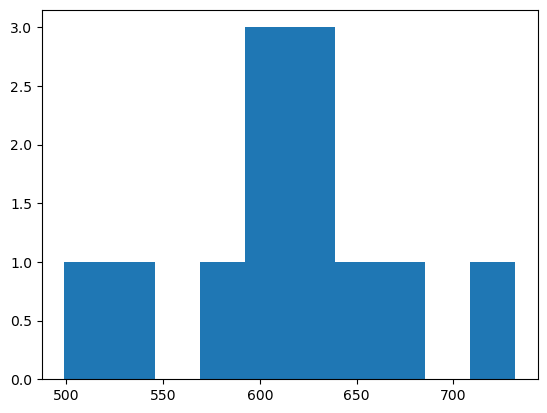

In [17]:
plt.hist(mean_intensities)
plt.show()

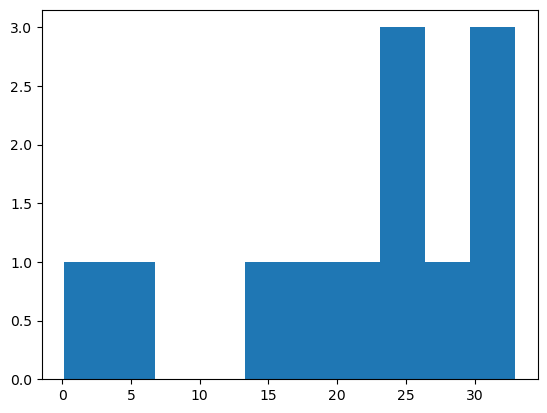

In [18]:
plt.hist(square_micrometer_area)
plt.show()

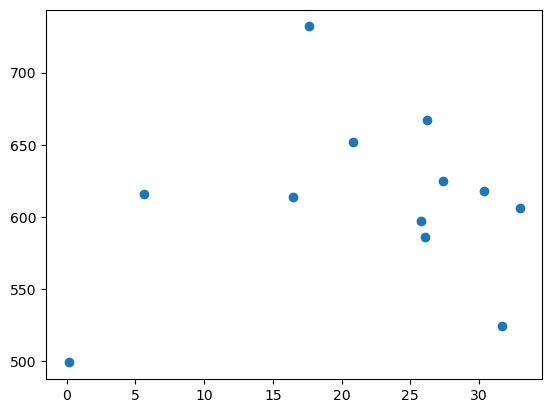

In [19]:
plt.scatter(square_micrometer_area, mean_intensities)
plt.show()

# Exercise

To better understand how`labeled_comprehension` works', write a function using a for loop, `np.unique` and `np.std` to retrieve the standard deviation of intensity values for each object in the image used above. Then apply your function and plot a histogram of its results.

In [ ]:
def object_standard_deviation(input_image, segmented_image):
    
    return